# KNN classification with added variables

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray
import sklearn
import utils

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

from matplotlib import colors

In [17]:
CI02 = pd.DataFrame(np.load("./data/for_learning_plus/CI02.npy"),
                    columns=['Y', 'dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']
                    )
CI04 = pd.DataFrame(np.load("./data/for_learning_plus/CI04.npy"),
                    columns=['Y', 'dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']
                    )
CI06 = pd.DataFrame(np.load("./data/for_learning_plus/CI06.npy"),
                    columns=['Y', 'dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']
                    )
CI09 = pd.DataFrame(np.load("./data/for_learning_plus/CI09.npy"),
                    columns=['Y', 'dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']
                    )
# CI21 = pd.DataFrame(np.load("./data/for_learning_plus/CI21.npy"),
#                     columns=['Y', 'dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
#                     'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
#                              'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']
#                     )

In [18]:
data = CI02

In [19]:
X = data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']] 

y = data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.984873358348968
Precision: 0.8633879781420765
Recall: 0.7769333929369692


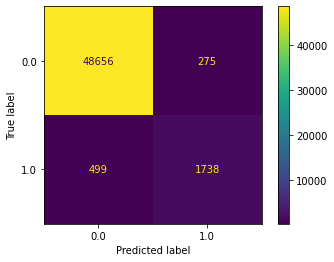

In [23]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

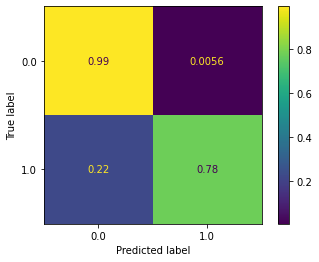

In [24]:
plot_confusion_matrix(clf, X_test, y_test,normalize="true")  
plt.show()

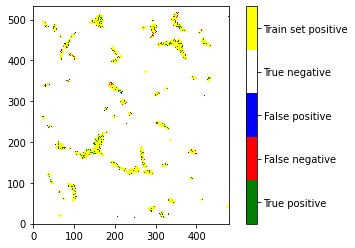

In [25]:
im_shape = np.shape(np.load("data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_test,im_shape,y_train)

# Predict on CI06 or others images

In [26]:
X_val = CI06[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']] 
y_val = CI06['Y'] 
#np.shape(np.load("data/for_learning/CI06.npy"))

In [27]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [28]:
y_pred = clf.predict(X_val)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
#print("Confusion matrix:\n",metrics.confusion_matrix(y_val, y_pred))

Accuracy: 0.9122066005040957
Precision: 0.1055004508566276
Recall: 0.098920395421436


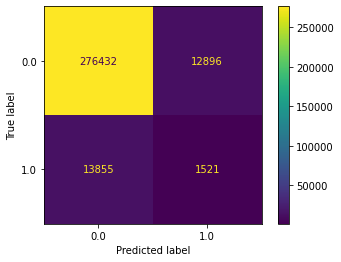

In [30]:
plot_confusion_matrix(clf, X_val, y_val)  
plt.show()

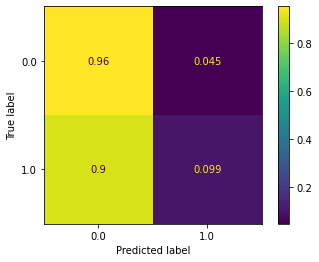

In [31]:
plot_confusion_matrix(clf, X_val, y_val,normalize="true")  
plt.show()

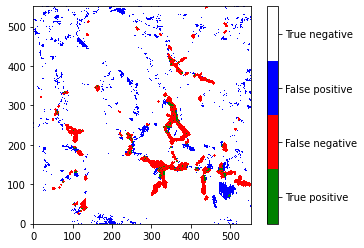

In [32]:
im_shape = np.shape(np.load("data/for_learning/CI06.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

# Predict on all CI02

In [33]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']] 
y_val = CI02['Y'] 
#np.shape(np.load("data/for_learning/CI02.npy"))

In [34]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [35]:
y_pred = clf.predict(X_val)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
#print("Confusion matrix:\n",metrics.confusion_matrix(y_val, y_pred))

Accuracy: 0.989423076923077
Precision: 0.9113578620494965
Recall: 0.8459254083326054


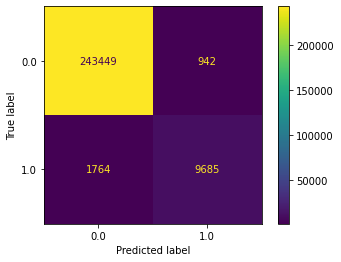

In [37]:
plot_confusion_matrix(clf, X_val, y_val)  
plt.show()

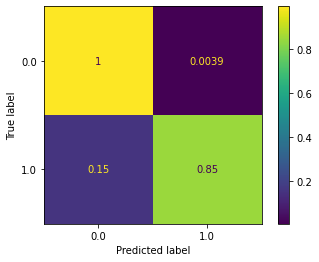

In [38]:
plot_confusion_matrix(clf, X_val, y_val,normalize="true")  
plt.show()

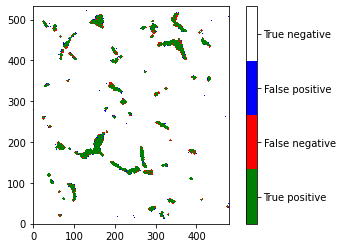

In [39]:
im_shape = np.shape(np.load("data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

------------------------------------------------------------------

# XGB on sub dataset

In [40]:
sub_data = data[(2*data["dist2GB"] + data["dist2TJ"] < 60)]

In [41]:
X = sub_data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']] 
y = sub_data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.981710514141196
Precision: 0.8957322987390882
Recall: 0.8301123595505618


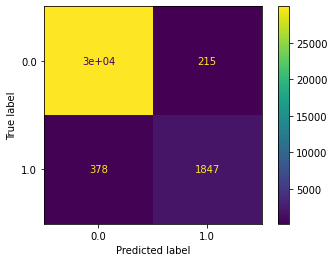

In [45]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

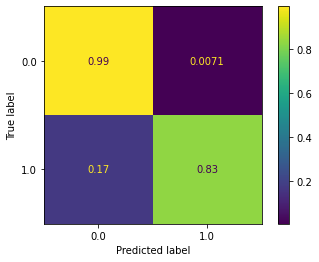

In [46]:
plot_confusion_matrix(clf, X_test, y_test,normalize='true')  
plt.show()

## Prediction on CI02

In [47]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']] 
y_val = CI02['Y'] 
#np.shape(np.load("data/for_learning/CI02.npy"))

In [48]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [49]:
y_pred = clf.predict(X_val)

In [50]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
#print("Confusion matrix:\n",metrics.confusion_matrix(y_val, y_pred))

Accuracy: 0.9528963414634146
Precision: 0.4832554517133956
Recall: 0.7587562232509389


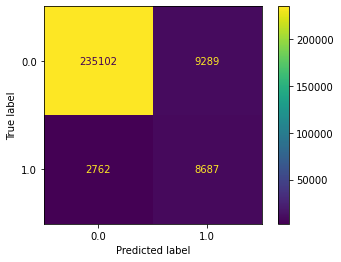

In [51]:
plot_confusion_matrix(clf, X_val, y_val)  
plt.show()

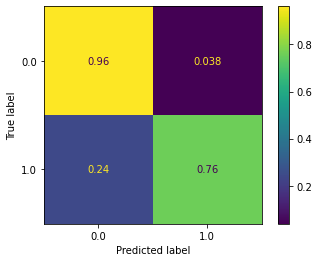

In [52]:
plot_confusion_matrix(clf, X_val, y_val,normalize="true")  
plt.show()

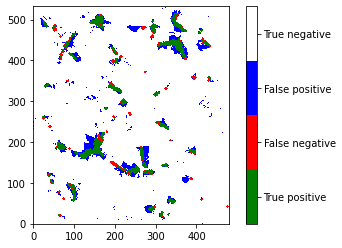

In [53]:
im_shape = np.shape(np.load("data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Prediction on CI06

In [54]:
X_val = CI06[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']] 
y_val = CI06['Y'] 
#np.shape(np.load("data/for_learning/CI06.npy"))

In [55]:
sc = StandardScaler()
X_val = sc.fit_transform(X_val)

In [56]:
y_pred = clf.predict(X_val)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
#print("Confusion matrix:\n",metrics.confusion_matrix(y_val, y_pred))

Accuracy: 0.8896502835538752
Precision: 0.08673792916025003
Recall: 0.12454474505723205


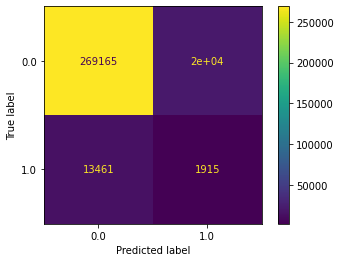

In [58]:
plot_confusion_matrix(clf, X_val, y_val)  
plt.show()

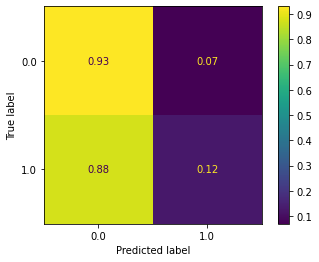

In [59]:
plot_confusion_matrix(clf, X_val, y_val,normalize="true")  
plt.show()

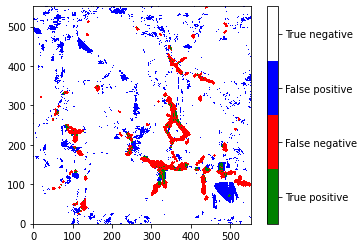

In [60]:
im_shape = np.shape(np.load("data/for_learning/CI06.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)